In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import csv



In [27]:

def read_csv_with_header(file_path, start_row):
    try:
        df = pd.read_csv(file_path, header=start_row)
        return df
    except Exception as e:
        print("Error occurred:", e)
        return None

    
csv_file_path = 'C:/Users/hodan/OneDrive/Desktop/Video codes/Joint_Angles.csv'
start_row = 14

data = read_csv_with_header(csv_file_path, start_row)

if data is None:
    print("Failed to read rows from the CSV file.")


In [30]:
np.shape(data)

(16335, 40)

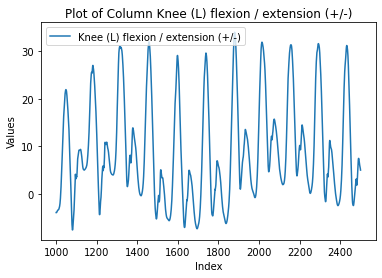

In [16]:

# ploting
    
column_name = 'Knee (L) flexion / extension (+/-)'
plt.plot(data.loc[1000:2500,column_name], label=column_name)
plt.xlabel("Index")  # You can customize the x-axis label if needed
plt.ylabel("Values")  # You can customize the y-axis label if needed
plt.title("Plot of Column {}".format(column_name))
plt.legend()
plt.show()

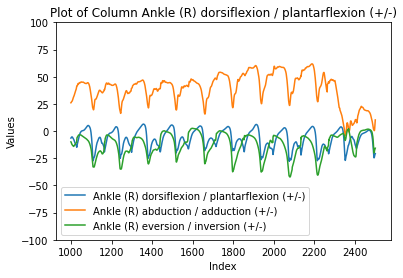

In [33]:
    
column_name1 = 'Ankle (R) dorsiflexion / plantarflexion (+/-)'
column_name2 = 'Ankle (R) abduction / adduction (+/-)'
column_name3 = 'Ankle (R) eversion / inversion (+/-)'
start = 1000
end = 2500
plt.plot(data.loc[start:end,column_name1], label=column_name1)
plt.plot(data.loc[start:end,column_name2]+90, label=column_name2)
plt.plot(data.loc[start:end,column_name3], label=column_name3)

plt.xlabel("Index")  # You can customize the x-axis label if needed
plt.ylabel("Values")  # You can customize the y-axis label if needed
plt.title("Plot of Column {}".format(column_name1))
plt.legend()

# Set the y-axis (values axis) limits
plt.ylim(-100, 100)  # Replace your desired lower and upper bounds

plt.show()

In [85]:
A=(np.load('C:/Users/hodan/OneDrive/Desktop/Video codes/outputs_finetuned/Predictions_S29.npy'))
#A=(np.load('C:/Users/hodan/OneDrive/Desktop/Video codes/outputs_pretrained/Predictions_S10.npy'))
# Create separate DataFrames df1, df2, ..., df15
for i in range(15):
    # Create the DataFrame with the name 'df{i}'
    dataframe_name = 'df{}'.format(i)
    exec(f"{dataframe_name} = pd.DataFrame(A[:, {i}, :])")
np.shape(A)

(860, 15, 3)

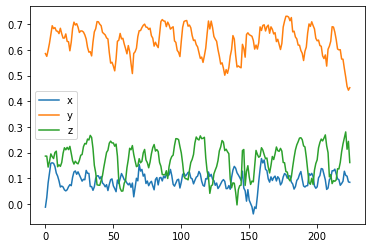

In [64]:
### start = 120
#end = 20000

#plt.plot(df1.loc[start:end],label='raw')
plt.plot(df3[0],label='x')
plt.plot(df3[1],label='y')
plt.plot(df3[2],label='z')
plt.legend()

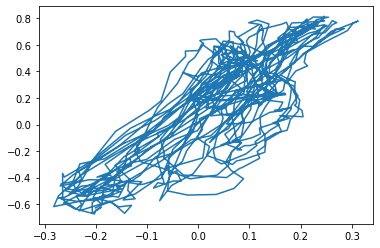

In [86]:
x = df3[0]
y = df3[1]
z = df3[2]

plt.plot(x,z)

### Moving Average Filter:
The moving average filter calculates the average of a window of data points and replaces the center data point with the calculated average. It is a simple and effective way to smooth out noise and fluctuations in the data.

In [87]:
import numpy as np

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


window_size = 25
smoothed_data = pd.DataFrame(moving_average(y, window_size))


### Savitzky-Golay Filter:
The Savitzky-Golay filter is a polynomial smoothing filter that fits a polynomial to a sliding window of data points and calculates the smoothed value at the center point of the window.

In [36]:
from scipy.signal import savgol_filter

window_size = 5
polynomial_order = 2
savgol_data = pd.DataFrame(savgol_filter(y, window_size, polynomial_order))


### Exponential Moving Average (EMA):
The exponential moving average assigns exponentially decreasing weights to data points, giving more importance to recent data while still considering past data.

In [37]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return np.array(ema)

alpha = 0.2  # Smoothing factor (0 < alpha < 1)
exmoving_data =pd.DataFrame(exponential_moving_average(y,alpha))


### Low-pass filter:
The low-pass filter is a signal processing filter that allows low-frequency components to pass through while attenuating (reducing) the amplitude of high-frequency components. In other words, it smooths a signal by removing noise and high-frequency variations, keeping the low-frequency information intact.

In [38]:
from scipy.signal import butter, filtfilt


# Design the Butterworth low-pass filter
cutoff_freq = 5  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 15  # Nyquist frequency (sampling_rate/2)
order = 4  # Filter order (higher order means steeper roll-off)

# Calculate the critical frequency as a fraction of the Nyquist frequency
normal_cutoff = cutoff_freq / nyquist_freq

# Design the Butterworth filter
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the low-pass filter using filtfilt to get zero-phase filtering
butter_data =pd.DataFrame(filtfilt(b, a, y))



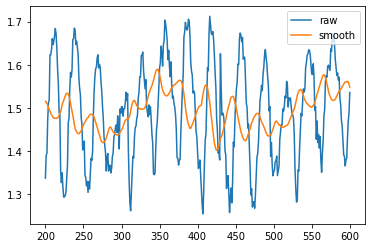

In [88]:
start = 200
end = 600

plt.plot(y.loc[start:end],label='raw')
plt.plot(smoothed_data.loc[start:end],label='smooth')
#plt.plot(savgol_data.loc[start:end],label='savgol')
#plt.plot(exmoving_data.loc[start:end],label='exmoving')
#plt.plot(butter_data.loc[start:end],label='butter')

plt.legend()

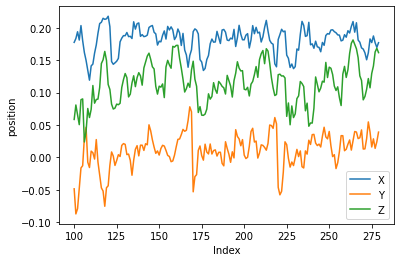

In [40]:
column_name1 = 'X'
column_name2 = 'Y'
column_name3 = 'Z'
start = 100
end = 1000

plt.plot(df14.loc[start:end,0], label=column_name1)
plt.plot(df14.loc[start:end,1], label=column_name2)
plt.plot(df14.loc[start:end,2], label=column_name3)

plt.xlabel("Index")  # You can customize the x-axis label if needed
plt.ylabel("position")  # You can customize the y-axis label if needed
#plt.title("Plot of Column {}".format(column_name1))
plt.legend()

# Set the y-axis (values axis) limits
#plt.ylim(-40, 15)  # Replace your desired lower and upper bounds
